In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("breast.csv")


In [3]:
df.info() #check if there is missing data (null value)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
dataset = df.iloc[:, :-1] #drop the last column (error coloumn)

In [7]:
dataset.drop(labels='id', axis=1,inplace=True) #drop the id, because we don't need this, and no has no usefull and meaning for prediction

In [8]:
dataset["diagnosis"].value_counts() # imbalance data

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
######### VISUALIZATION #################

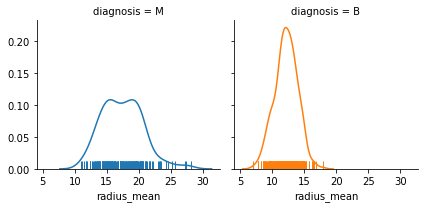

In [10]:
#Ploting relationship between radius_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "radius_mean", hist=False, rug=True)

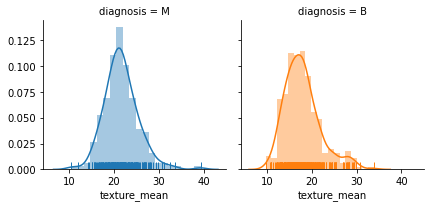

In [11]:
#Ploting relationship between texture_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "texture_mean", hist=True, rug=True)

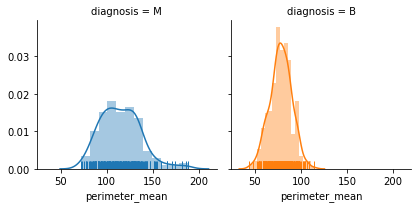

In [12]:
#Ploting relationship between perimeter_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "perimeter_mean", hist=True, rug=True)

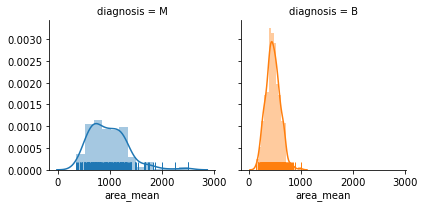

In [13]:
#Ploting relationship between area_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "area_mean", hist=True, rug=True)

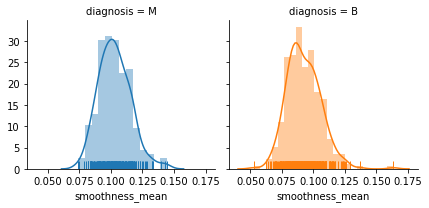

In [14]:
#Ploting relationship between smoothness_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "smoothness_mean", hist=True, rug=True)

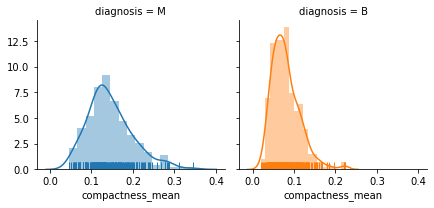

In [15]:
#Ploting relationship between compactness_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "compactness_mean", hist=True, rug=True)

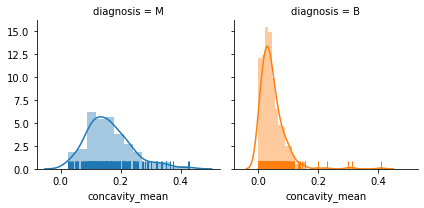

In [16]:
#Ploting relationship between concavity_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "concavity_mean", hist=True, rug=True)

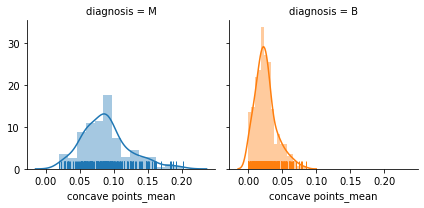

In [17]:
#Ploting relationship between concave point_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "concave points_mean", hist=True, rug=True)

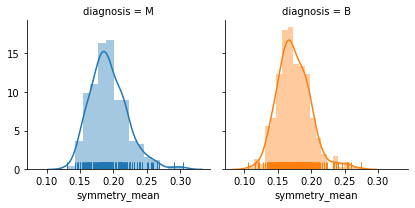

In [18]:
#Ploting relationship between symetry_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "symmetry_mean", hist=True, rug=True)


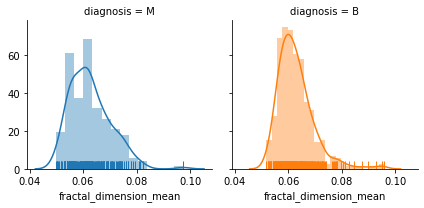

In [19]:
#Ploting relationship between fractal_dimension_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "fractal_dimension_mean", hist=True, rug=True)

In [20]:
### It seems almost all data approximately symetry (base on display for each features), therefore no need to log 

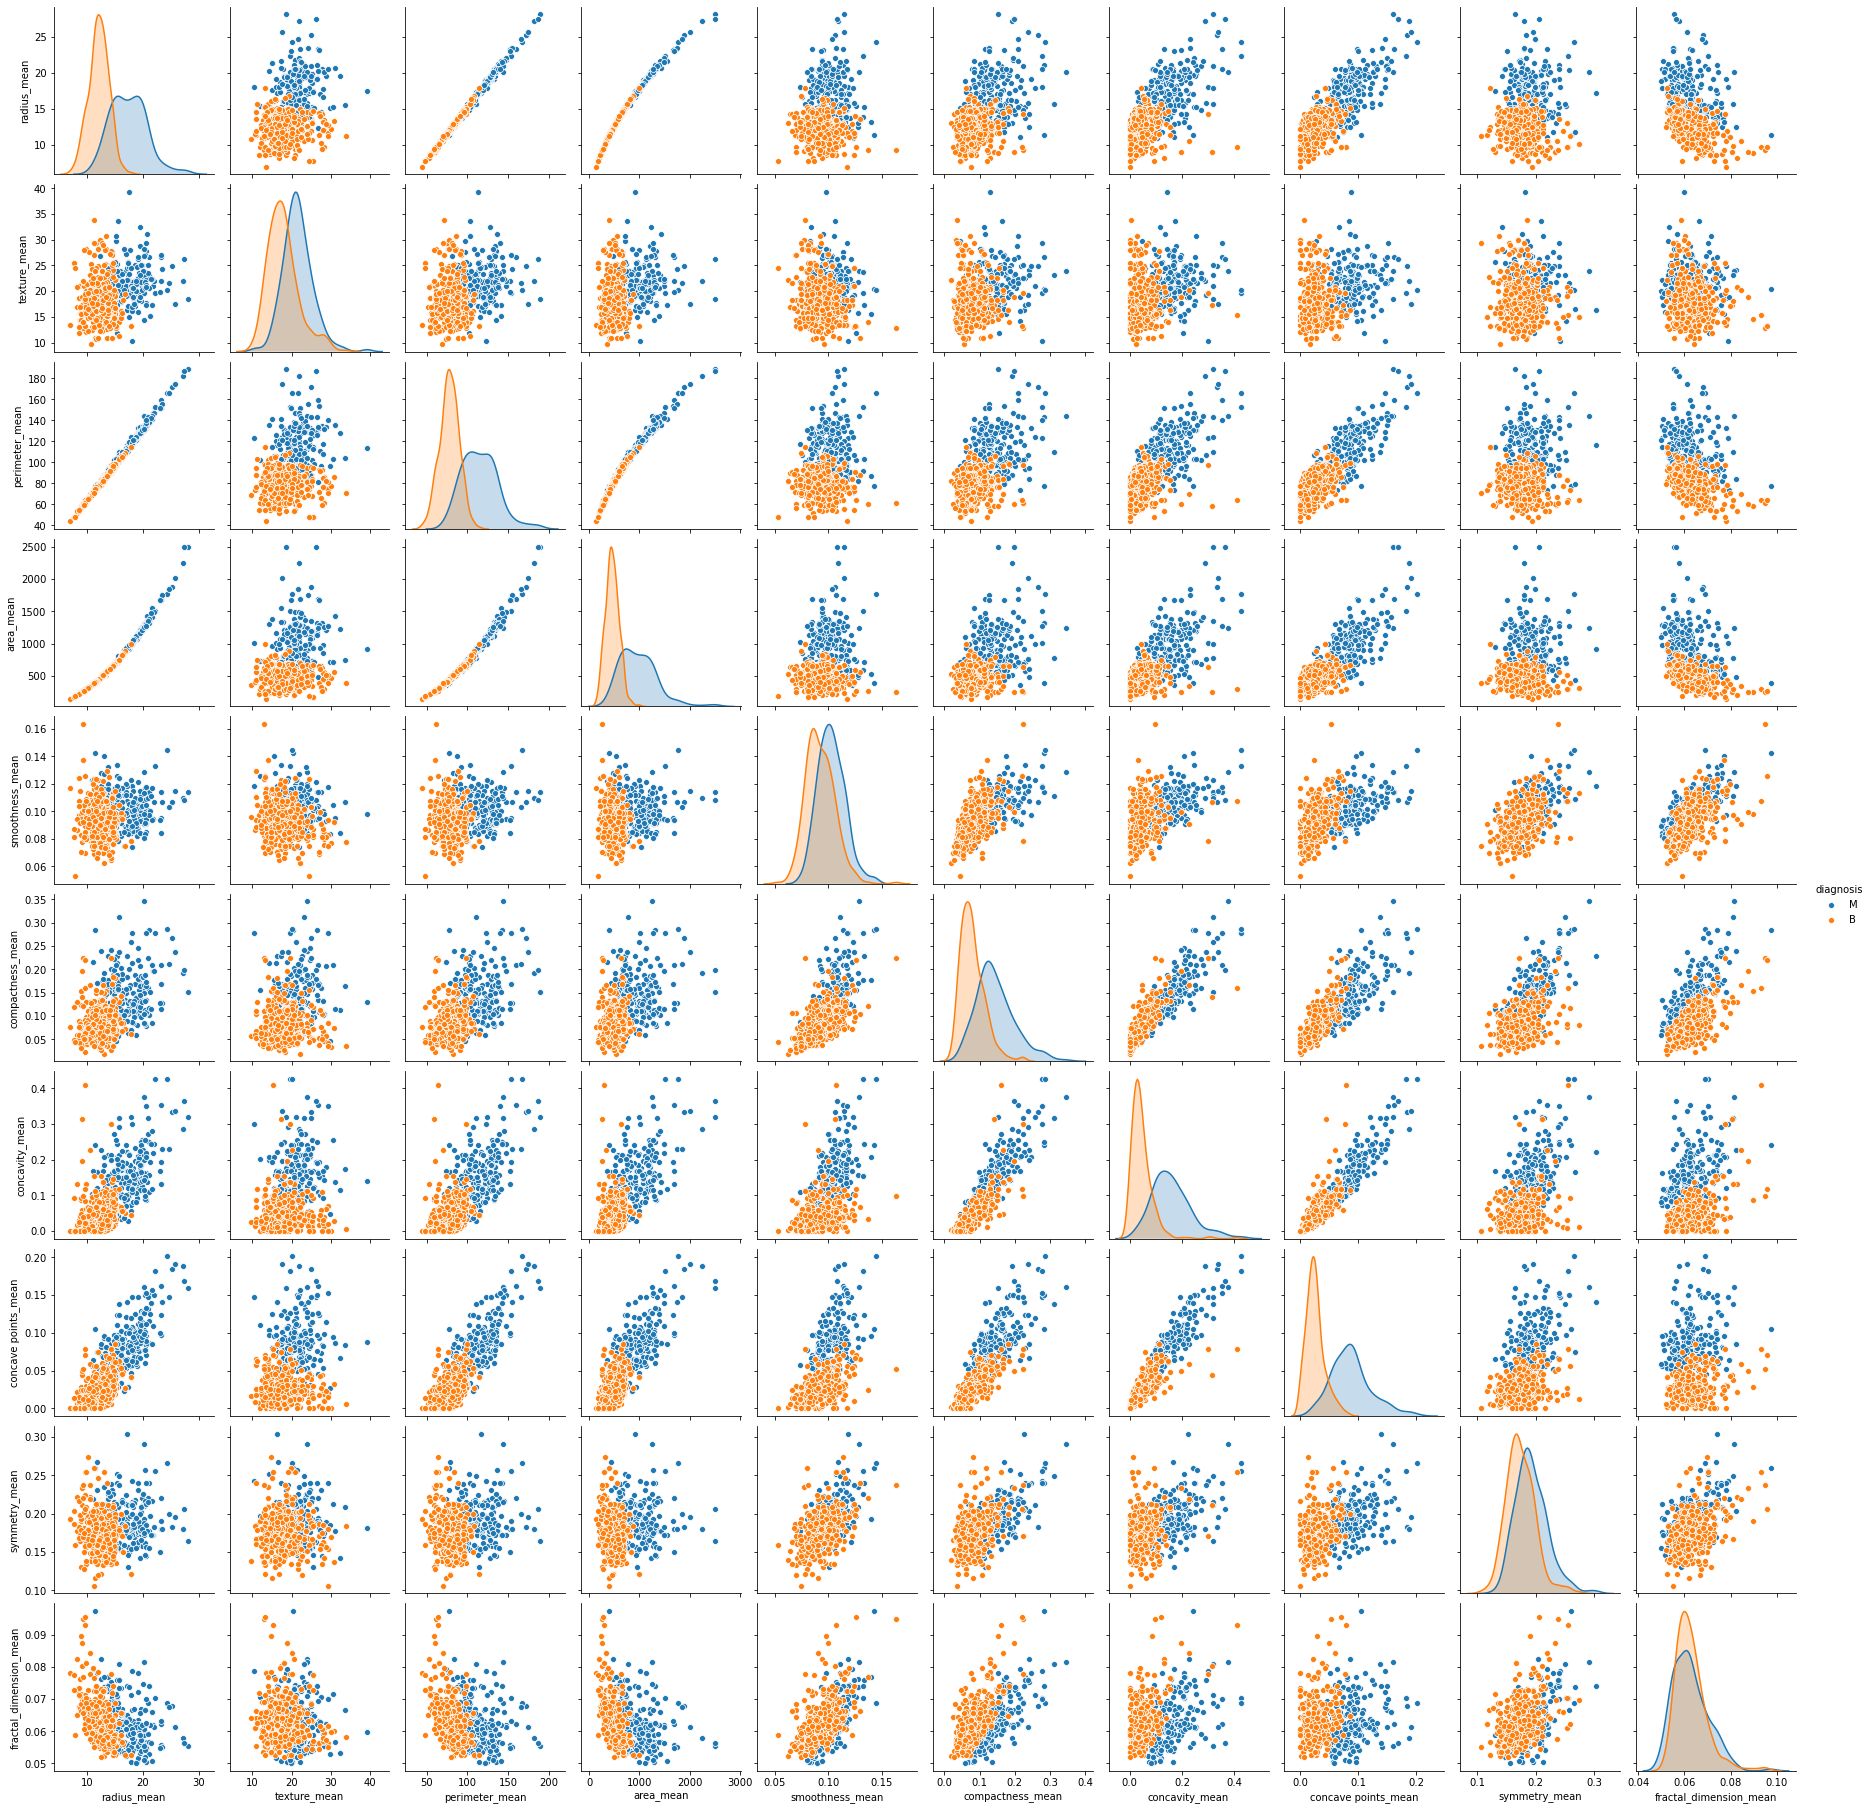

In [21]:
sns.pairplot(df,hue="diagnosis",vars = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"])

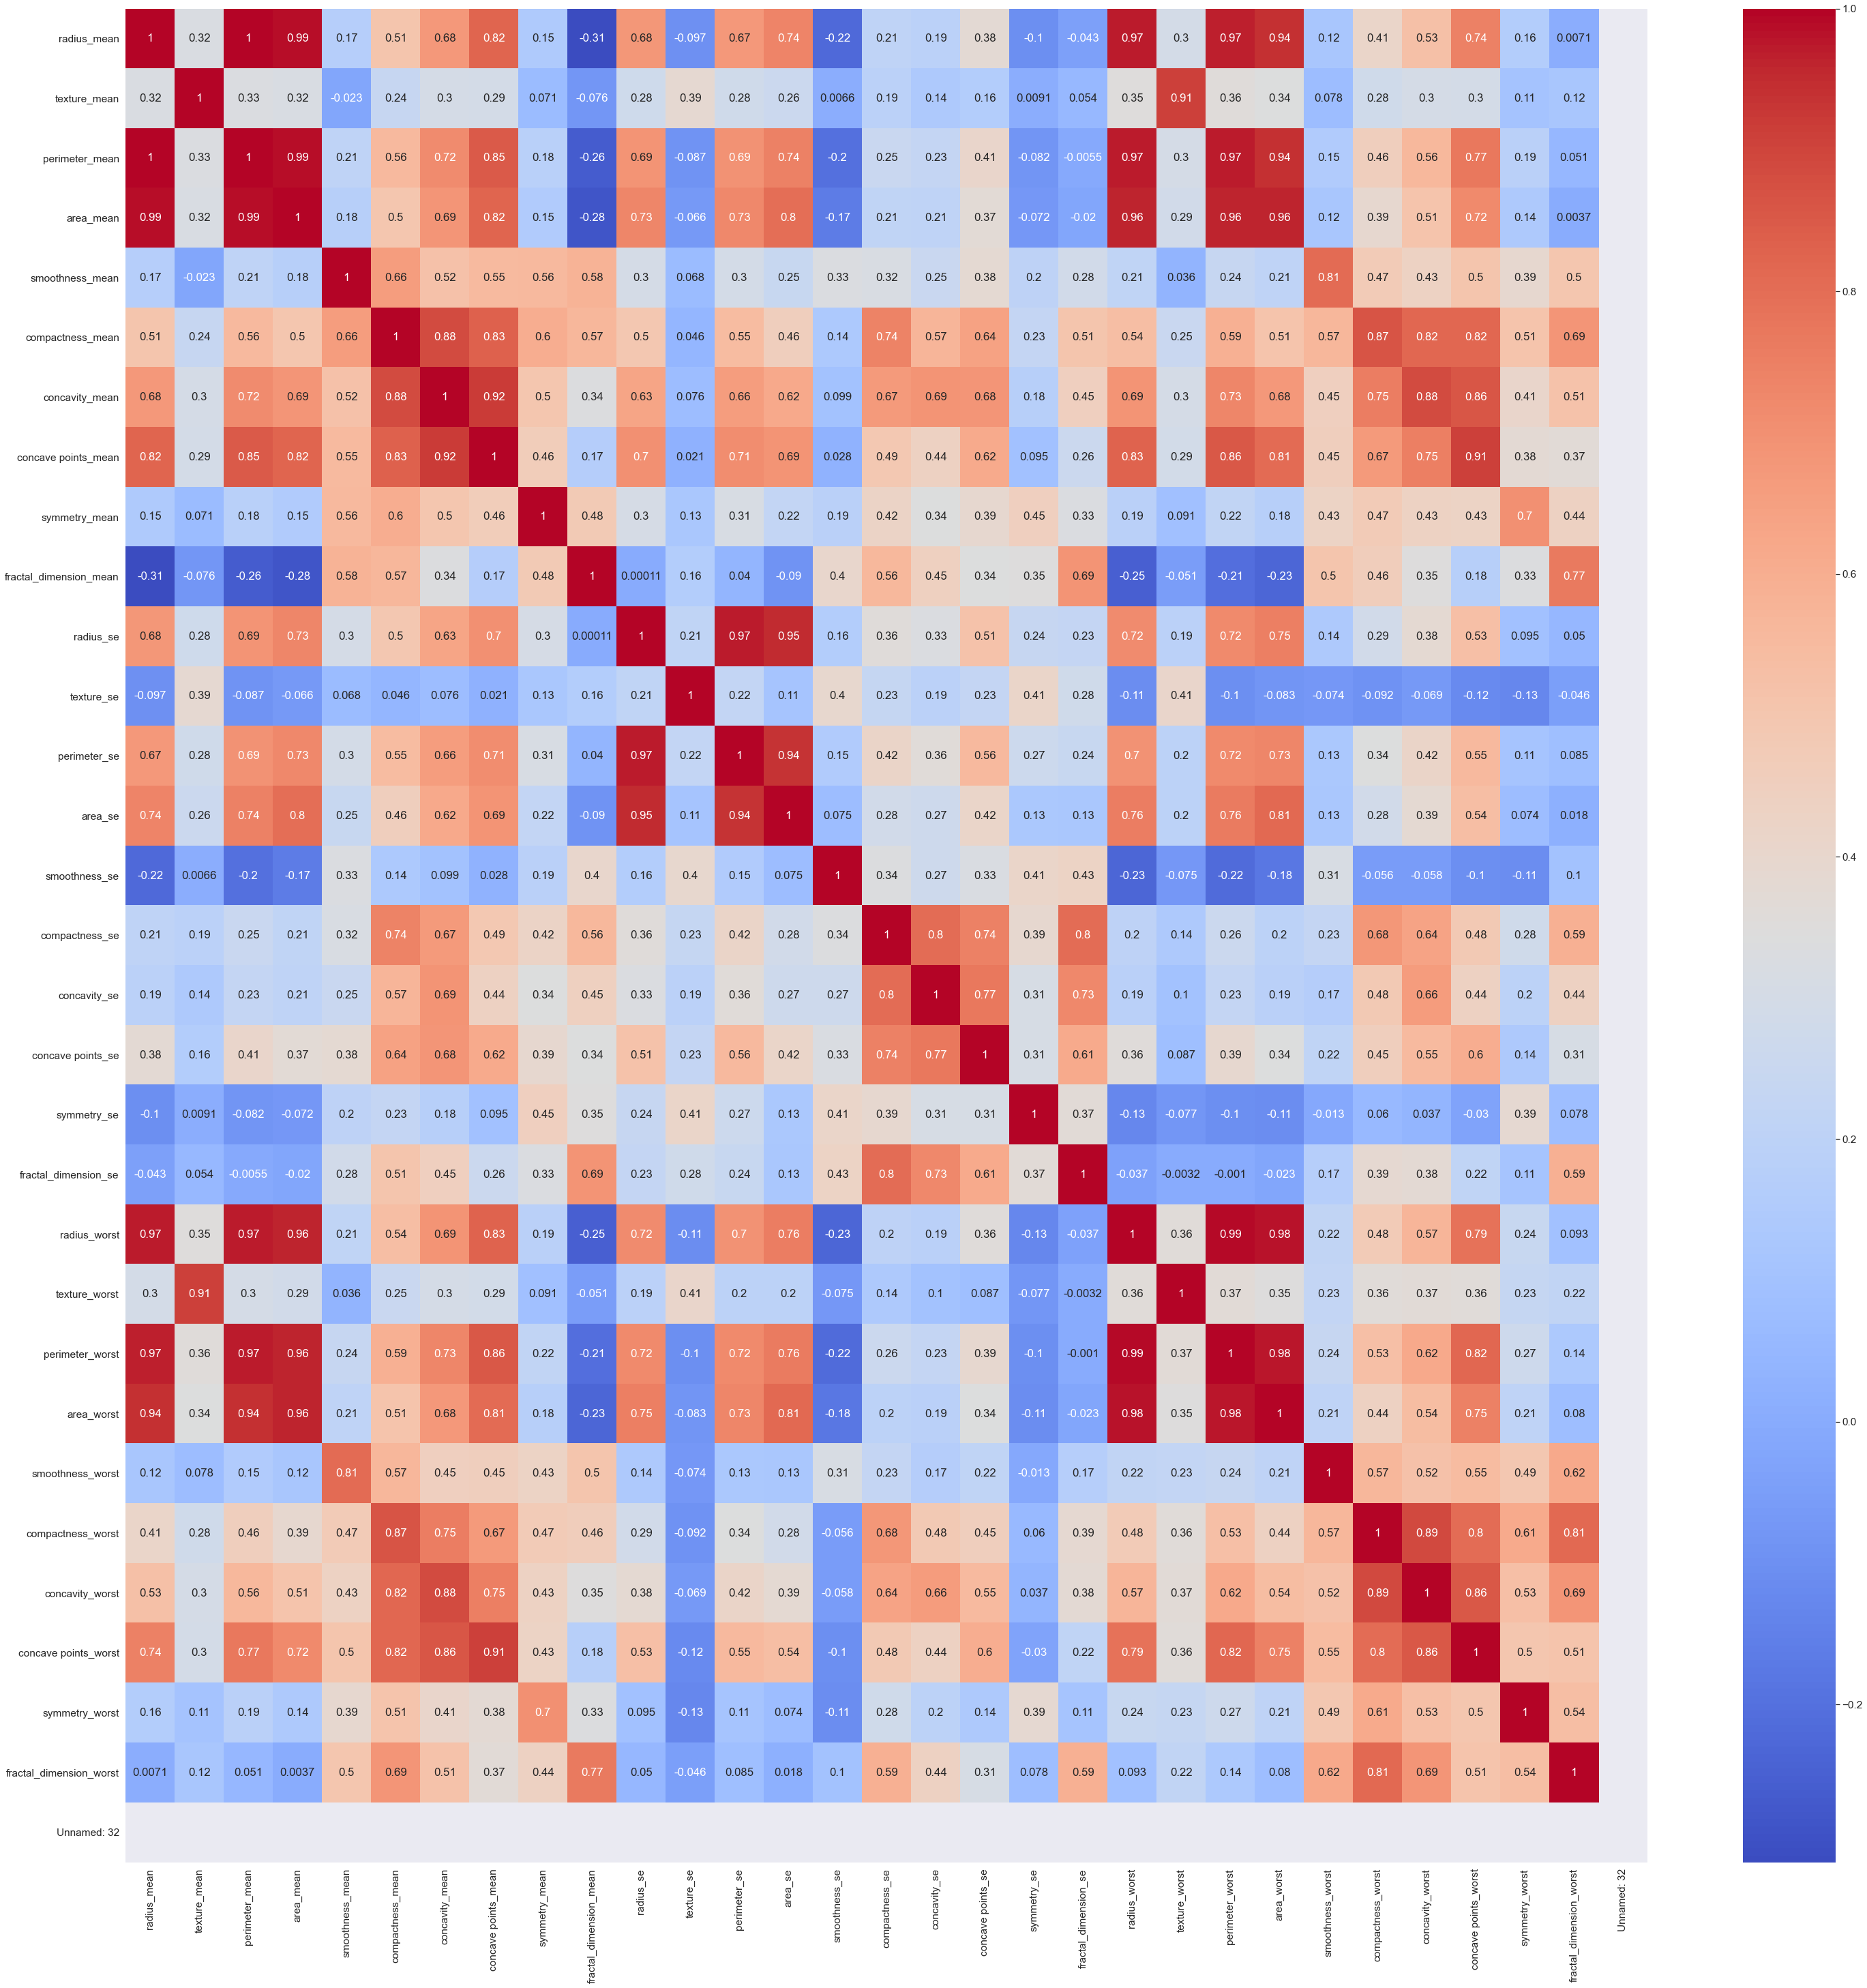

In [24]:
## Looking for correlation between each features


#Explore correlations
plt.rcParams['figure.figsize']=(50,50)
sns.set(font_scale=1.4)
sns.heatmap(df.drop('diagnosis', axis=1).drop('id',axis=1).corr(), cmap='coolwarm',annot=True)

In [25]:
Target= pd.get_dummies(dataset["diagnosis"],drop_first=True)  #convert Malign to 1 and Benign to 0

In [26]:
dataset= pd.concat([dataset,Target],axis=1)

In [27]:
dataset[18:25]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
18,M,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,...,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615,1
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259,0
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,0
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,0
22,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,...,19.08,125.10,980.9,0.1390,0.5954,0.63050,0.23930,0.4667,0.09946,1
23,M,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,...,35.59,188.00,2615.0,0.1401,0.2600,0.31550,0.20090,0.2822,0.07526,1
24,M,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,...,31.56,177.00,2215.0,0.1805,0.3578,0.46950,0.20950,0.3613,0.09564,1


In [28]:
dataset.drop(labels='diagnosis', axis=1,inplace=True) #drop the diagnosis,because we have changed B/M to M's coloumn (numerical_number)

In [29]:
dataset.rename(columns={"M": "target"},inplace=True)  #rename for convinient name only